In [42]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#loading the data from csv file
data = pd.read_csv("housing.csv")

In [44]:
#observing the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [45]:
#data exploration
data.info()

#in this dataset we have unequal number datasets i.e  no. of total bedrooms is not equal to total rooms and other datas
#to carry out the calculation we need to make the number of datasets equal so we can drop the null datasets so we can get only non-null value which eventually will be equal no. of datas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
#return data with only non-null value or in other words drop the data having null value
#"inplace=True permanently saves the edited data from the function dropna()"
data.dropna(inplace=True)



In [47]:
data.info()
#after dropping null values we get equal no. of data count of each class of data so that we can further continue our calculation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [48]:
#defining X and Y as known and unknown datasets simulteanously
from sklearn.model_selection import train_test_split

#X will be the dataframe without the target variable i.e median_house_value
X = data.drop(['median_house_value'], axis=1)

#Y is only going to be median house value(which we need to find)
y = data['median_house_value']

In [49]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [50]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [51]:
#splitting training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
#now we are going to join x_training_data and y_training_data so that we can observe some correlation between x and y.
train_data = X_train.join(y_train)

In [53]:
#here we can see the combined xy dataset
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11789,-121.23,38.79,45.0,907.0,176.0,463.0,190.0,2.2292,INLAND,92000.0
13441,-117.43,34.08,31.0,3207.0,560.0,1582.0,538.0,4.2630,INLAND,127400.0
10154,-117.90,33.88,28.0,2696.0,346.0,947.0,356.0,9.0055,<1H OCEAN,375400.0
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,<1H OCEAN,412300.0
16829,-122.47,37.61,34.0,4551.0,837.0,2208.0,834.0,5.4364,NEAR OCEAN,279300.0
...,...,...,...,...,...,...,...,...,...,...
11919,-117.42,33.95,32.0,4251.0,848.0,2494.0,798.0,2.8173,INLAND,110800.0
9869,-121.84,36.61,21.0,2876.0,802.0,2487.0,795.0,2.2007,<1H OCEAN,112800.0
18699,-122.36,40.58,17.0,1220.0,275.0,800.0,261.0,1.9181,INLAND,118800.0
8255,-118.17,33.77,38.0,2239.0,721.0,984.0,684.0,2.3460,NEAR OCEAN,165600.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

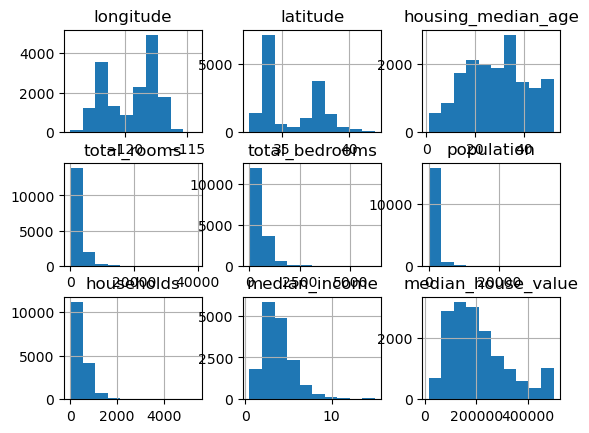

In [54]:
#let's see the histogram of the datasets
train_data.hist()

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

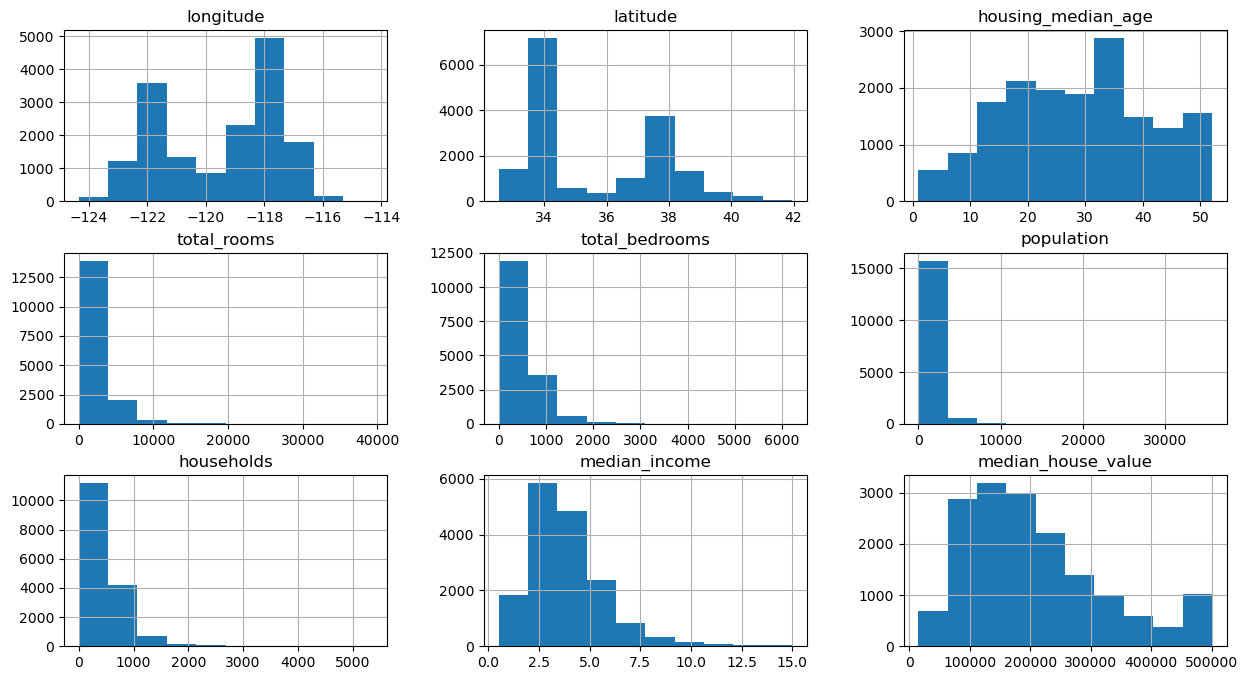

In [55]:
#here we can see the datasets and the target variable in graphical manner
train_data.hist(figsize=(15,8))

In [56]:
#correlation of datasets with the target variable
#correlation matrix
train_data.corr()

/tmp/ipykernel_16275/3846974952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924373,-0.107779,0.040118,0.065144,0.099268,0.052522,-0.015396,-0.046624
latitude,-0.924373,1.000000,0.010726,-0.033992,-0.065424,-0.108330,-0.069646,-0.081583,-0.145550
housing_median_age,-0.107779,0.010726,1.000000,-0.354135,-0.311520,-0.290939,-0.294476,-0.116771,0.106280
total_rooms,0.040118,-0.033992,-0.354135,1.000000,0.927848,0.854719,0.917091,0.200175,0.141279
total_bedrooms,0.065144,-0.065424,-0.311520,0.927848,1.000000,0.876422,0.980274,-0.009447,0.056919
population,0.099268,-0.108330,-0.290939,0.854719,0.876422,1.000000,0.905844,0.003046,-0.023066
households,0.052522,-0.069646,-0.294476,0.917091,0.980274,0.905844,1.000000,0.011399,0.072140
median_income,-0.015396,-0.081583,-0.116771,0.200175,-0.009447,0.003046,0.011399,1.000000,0.687066
median_house_value,-0.046624,-0.145550,0.106280,0.141279,0.056919,-0.023066,0.072140,0.687066,1.000000


/tmp/ipykernel_16275/2824903505.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

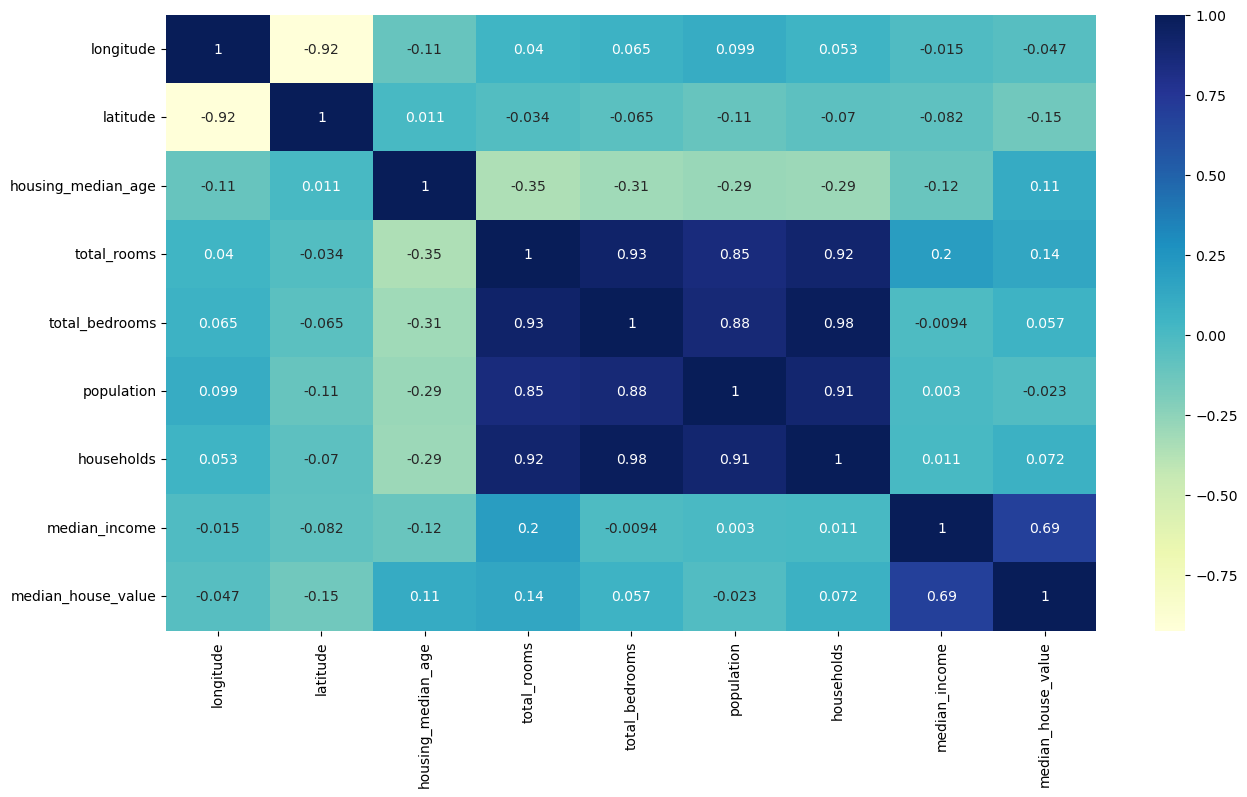

In [57]:
#plotting the above correlation matrix in heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
#where annot=annotation, cmap=colormap, YlGnBu=Yellow Green Blue
#we can see that the correlation of median_houe_value with other datasets which is the main goal of our data exploration
#for example longitude and latitude are negatively correlated, total_rooms is positively correlated with the median_house_value
#this is enough data exploration for this dataset for further calculations

In [59]:
#applying log distribution to the skewed datasets i.e total_rooms, total_bedrooms, population, households to normalize the data distribution
#By applying log on the x-axis, the skewness of datasets is converted to normal distribution of data.
#when the data is always positive it is most likely to end up in skewed distribution
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

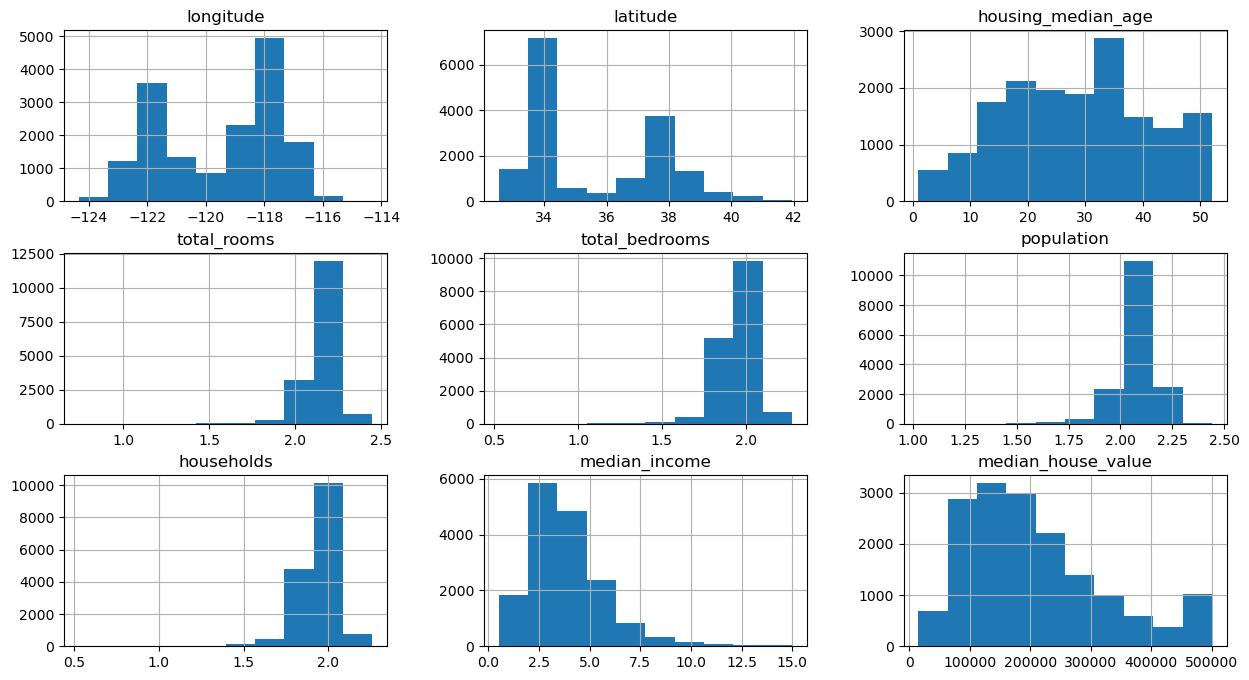

In [60]:
train_data.hist(figsize = (15,8))

In [61]:
#as we have discrete data values in ocean proximity, counting the discrete data of ocean proximity
train_data.ocean_proximity.value_counts()

<1H OCEAN     7253
INLAND        5192
NEAR OCEAN    2101
NEAR BAY      1795
ISLAND           5
Name: ocean_proximity, dtype: int64

In [63]:
#now we need to create the dummy rows to represent the <1H_ocean, INLAND, NEAR_OCEAN, NEAR_BAY, ISLAND, IN BINARY
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11789,0,1,0,0,0
13441,0,1,0,0,0
10154,1,0,0,0,0
18125,1,0,0,0,0
16829,0,0,0,0,1
...,...,...,...,...,...
11919,0,1,0,0,0
9869,1,0,0,0,0
18699,0,1,0,0,0
8255,0,0,0,0,1


In [67]:
#joining the dummy table with the original training data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [68]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11789,-121.23,38.79,45.0,2.055564,1.820695,1.965697,1.832945,2.2292,92000.0,0,1,0,0,0
13441,-117.43,34.08,31.0,2.205347,1.991937,2.124305,1.986465,4.2630,127400.0,0,1,0,0,0
10154,-117.90,33.88,28.0,2.186040,1.924150,2.061068,1.928289,9.0055,375400.0,1,0,0,0,0
18125,-122.03,37.33,23.0,2.235169,2.016270,2.138424,2.010170,7.4863,412300.0,1,0,0,0,0
16829,-122.47,37.61,34.0,2.243188,2.045241,2.163357,2.044777,5.4364,279300.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11919,-117.42,33.95,32.0,2.235926,2.046926,2.177254,2.039057,2.8173,110800.0,0,1,0,0,0
9869,-121.84,36.61,21.0,2.193273,2.039707,2.176935,2.038567,2.2007,112800.0,1,0,0,0,0
18699,-122.36,40.58,17.0,2.092780,1.890156,2.039382,1.882262,1.9181,118800.0,0,1,0,0,0
8255,-118.17,33.77,38.0,2.164957,2.025780,2.065931,2.018818,2.3460,165600.0,0,0,0,0,1


<AxesSubplot: >

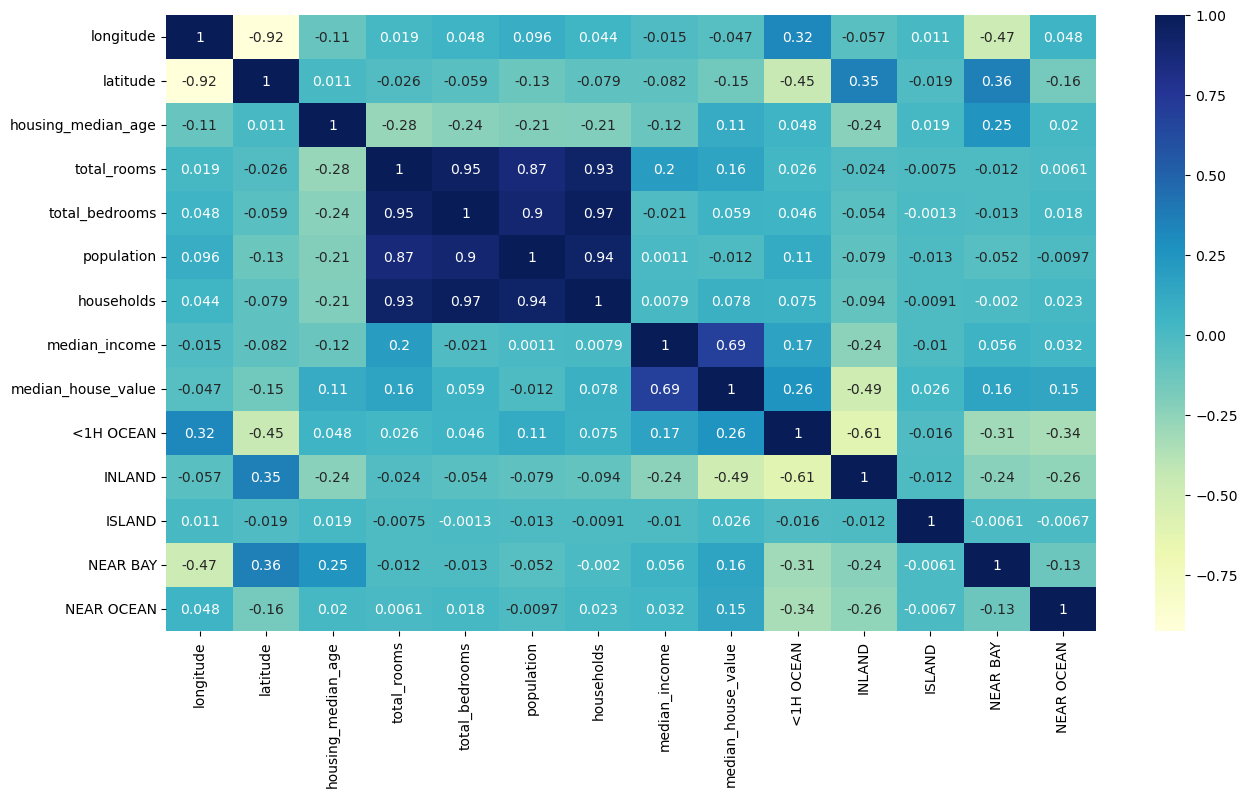

In [69]:
#again visualizing the data using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

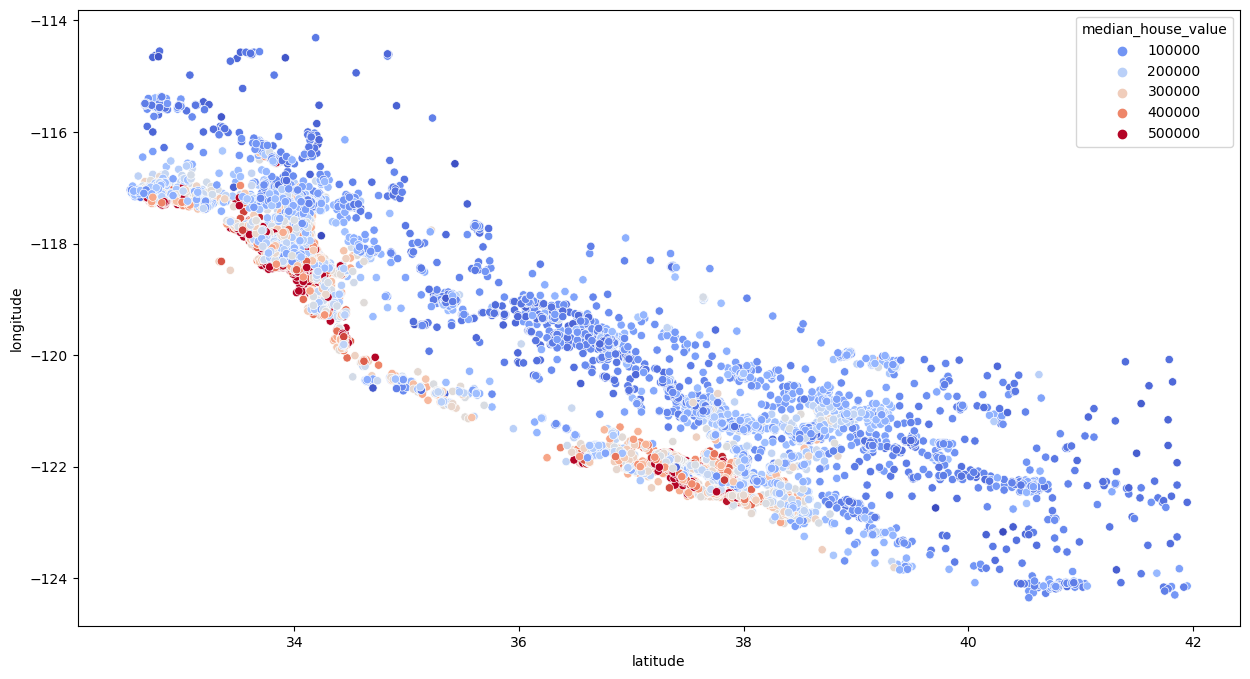

In [73]:
#drawing the map of the position of the houses according to the latitude and longitude 
#drawing scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
#the more f